In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import fowlkes_mallows_score, adjusted_mutual_info_score, adjusted_rand_score
from scipy.stats import wishart

from spectral import spectral_clustering

np.random.seed(42)

/home/przemyslaw/anaconda3/lib/python3.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/przemyslaw/spectral-clustering/python/spectral_aux.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [7]:
def get_random_clustering(n, n_clusters):
    X = []
    Y = []
    for i in range(n_clusters):
        mean = (i, i)
        #cov =  wishart.rvs(10, [[0.5, 0], [0, 0.5]])
        cov = [[0.2, 0], [0, 0.2]]
        X.append(np.random.multivariate_normal(mean, cov, n))
        Y.append(np.full(n, i))
    return np.concatenate(X), np.concatenate(Y)

def plot_2d_vectors(X, Y, title=None):
    """Plots 2D vectors represented as a matrix of 2d vectors with different colors for different classes"""
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    if title:
        plt.title(title)
    plt.show()

In [184]:
n = 30
k = 2
X, Y = get_random_clustering(n, k)

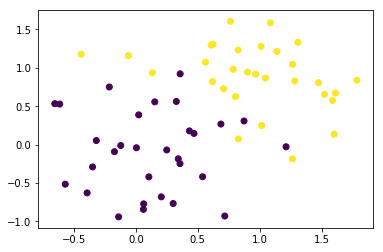

In [185]:
plot_2d_vectors(X, Y)

In [186]:
Y_pred = spectral_clustering(X, 2, 40)

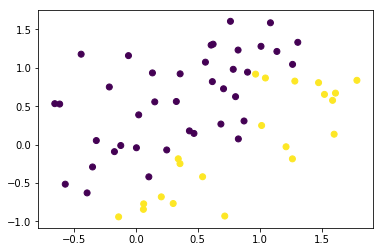

In [187]:
plot_2d_vectors(X, Y_pred)

Widzimy, że algorytm działa nie tak źle.

Number of clusters: 1


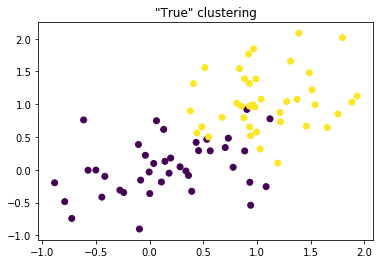

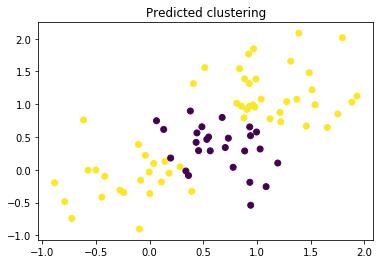

Number of clusters: 2


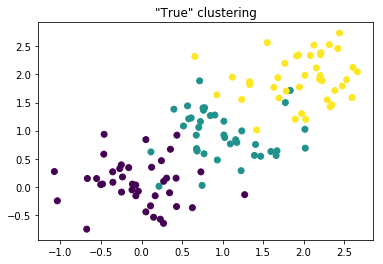

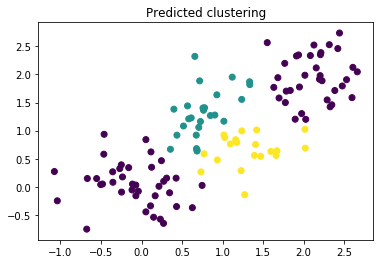

Number of clusters: 3


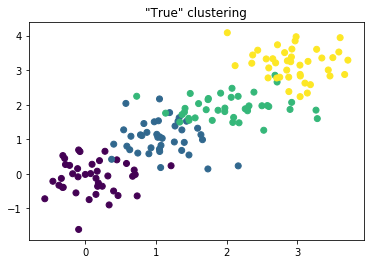

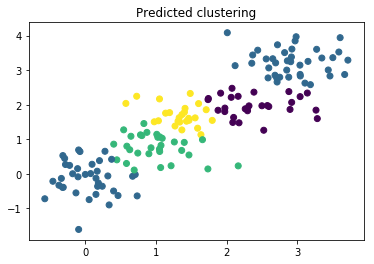

Number of clusters: 4


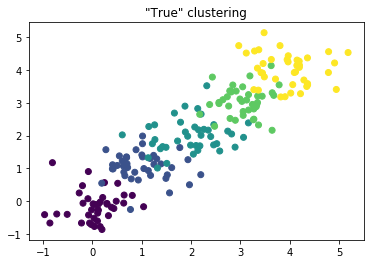

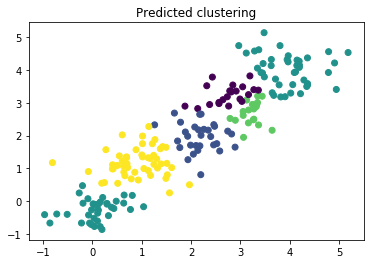

In [188]:
def generate_predict():
    for k in range(2, 6):
        print("Number of clusters: {}".format(k - 1))
        X, Y = get_random_clustering(40, k)
        plot_2d_vectors(X, Y, title="\"True\" clustering")
        Y_pred = spectral_clustering(X, k, 10)
        plot_2d_vectors(X, Y_pred, title="Predicted clustering")

generate_predict()

Czasami generowanie z losowych rozkładów sprawia, że podział jest mało wyraźny. 

Wciąż jednak z niewiadomych powodów spectral clustering łączy w jedno skupienie punkty bardzo odległe od siebie. Nie mam pojęcia skąd to wynika.

## Zapis danych

In [174]:
X, Y = get_random_clustering(40, 2)

In [181]:
def generate_save():
    for k in range(2, 10):
        X, Y = get_random_clustering(40, k)
        name_X = "normal_{}.data".format(k)
        name_Y = "normal_{}.labels".format(k)
        
        np.savetxt(os.path.join("datasets", name_X), X)
        np.savetxt(os.path.join("datasets", name_Y), Y) 

In [182]:
generate_save()

In [2]:
def get_heart(x_change, y_change, label):
    t = np.linspace(0, 6.28, 100)
    x1 = 16 * (np.sin(t))**3
    x2 = 13*np.cos(t) - 5*np.cos(2*t)  - 2*np.cos(3*t) - np.cos(4*t)
    X = np.array([[x + x_change, y + y_change] for x, y in zip(x1, x2)])
    Y = np.array([label for _ in range(len(x1))])
    
    return X, Y

In [4]:
X1, Y1 = get_heart(0, 0, 0)

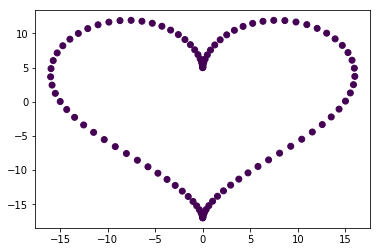

In [8]:
plot_2d_vectors(X1, Y1)

In [9]:
X2, Y2 = get_heart(5, 10, 1)

In [10]:
X = np.concatenate([X1, X2], axis=0)
Y = np.concatenate([Y1, Y2], axis=0)

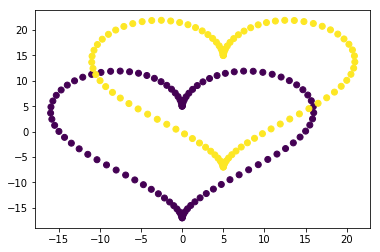

In [11]:
plot_2d_vectors(X, Y)

In [12]:
Y_pred = spectral_clustering(X, 2, 10)

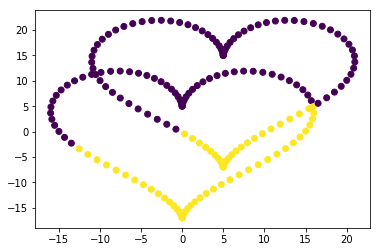

In [13]:
plot_2d_vectors(X, Y_pred)

No niestety, algorytm sobie nie poradził, ale nie jest źle.

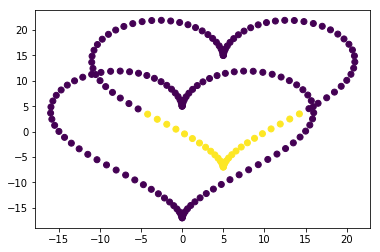

In [14]:
import genieclust
g = genieclust.genie.Genie(n_clusters=2)
Y_pred_genie = g.fit_predict(X)
plot_2d_vectors(X, Y_pred_genie)

Niestety, `genie` również sobie nie poradził :(

In [15]:
np.savetxt(os.path.join("datasets", "hearts.data"), X)
np.savetxt(os.path.join("datasets", "hearts.labels"), Y)

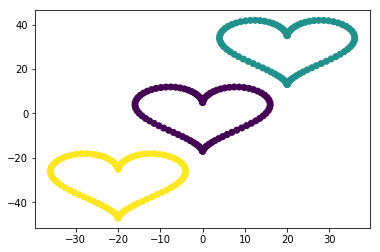

In [16]:
X1, Y1 = get_heart(0, 0, 0)
X2, Y2 = get_heart(20, 30, 1)
X3, Y3 = get_heart(-20, -30, 2)
X = np.concatenate([X1, X2, X3], axis=0)
Y = np.concatenate([Y1, Y2, Y3], axis=0)
plot_2d_vectors(X, Y)

Dla dwóch klas:

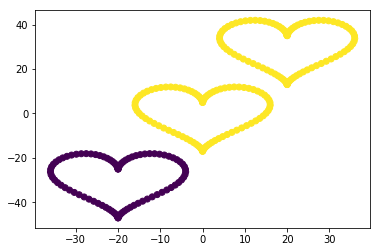

In [20]:
Y_pred = spectral_clustering(X, 2, 11)
plot_2d_vectors(X, Y_pred)

Dla 3 klas:

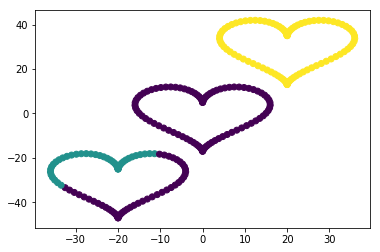

In [18]:
Y_pred = spectral_clustering(X, 3, 20)
plot_2d_vectors(X, Y_pred)

Niestety i tym razem spectral clustering się nie udało. Zdumiewa mnie natomiast fakt, że klasyfikuje on do jednej klasy odległe od siebie punkty i nic z tego nie rozumiem. Nie mam niestety już czasu, żeby to dokładniej przetestować (być może mam jakiś błąd w implementacji) i wysnuć jakieś sensowne wnioski.

In [ ]:
np.savetxt(os.path.join("datasets", "three_hearts.data"), X)
np.savetxt(os.path.join("datasets", "three_hearts.labels"), Y)